# Neural Networks

In biology, a neuron serves to take a bunch of inputs, do some "computation", and sends an output signal.

I'll be using `daft` to draw some diagrams.  You can install it with `pip install 'daft-pgm'`.

## Logistic Unit

In [1]:
import numpy as np
import matplotlib as mpl
import daft

mpl.rcParams['figure.facecolor'] = "292a2b"
mpl.rcParams['figure.edgecolor'] = "292a2b"
mpl.rcParams['axes.facecolor'] = "292a2b"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 14
mpl.rcParams['text.color'] = "ffffff"

# dark theme
neuron_style = {"fc": "#292a2b", "ec": "#f4a041"}
node_pps = {"fc": "#292a2b", "ec": "w"}
edge_pps = {"ec": "w", "fc": "w"}
output_style = {"lw": 0, "fc": "#292a2b", "ec": "#ffffff"}
label_style = {"lw": 0, "fc": "#292a2b", "ec": "#ffffff"}

node_edge_color = "w"
# os = "inner"

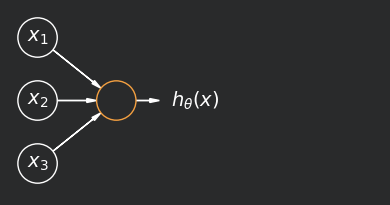

In [2]:
pgm = daft.PGM([4.7, 2.35], origin=[-1.35, 2.], node_ec=node_edge_color)

# Layer 1
xpos = -1
pgm.add_node(daft.Node("x1", r"$x_1$", xpos, 4, plot_params=node_pps))
pgm.add_node(daft.Node("x2", r"$x_2$", xpos, 3.2, plot_params=node_pps))
pgm.add_node(daft.Node("x3", r"$x_3$", xpos, 2.4, plot_params=node_pps))

# Layer 2
xpos += 1
pgm.add_node(daft.Node("neuron", "", 0, 3.2, plot_params=neuron_style))

# Hypothesis
xpos += 1
pgm.add_node(daft.Node("h", r"$h_\theta(x)$", 1, 3.2, aspect=1.8, plot_params=output_style))

pgm.add_edge("x1", "neuron", plot_params=edge_pps)
pgm.add_edge("x2", "neuron", plot_params=edge_pps)
pgm.add_edge("x3", "neuron", plot_params=edge_pps)
pgm.add_edge("neuron", "h", plot_params=edge_pps)

pgm.show()

Some new terminology: the sigmoid function is an *activation function*, and parameters $\{\theta_1, \theta_2, \ldots\}$ can be called *weights*.

## Neural Network

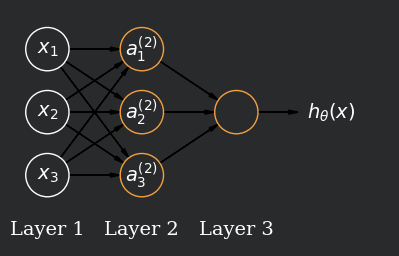

In [3]:
pgm = daft.PGM([4.7, 3], node_unit=1.1, origin=[-1.35, 2.])

xpos = -1
ypos = 4.5
yspace = .8
pgm.add_node(daft.Node("x1", r"$x_1$", xpos, ypos, plot_params=node_pps))
pgm.add_node(daft.Node("x2", r"$x_2$", xpos, ypos-yspace, plot_params=node_pps))
pgm.add_node(daft.Node("x3", r"$x_3$", xpos, ypos-2*yspace, plot_params=node_pps))
pgm.add_node(daft.Node("layer1", "Layer 1", xpos, 2.2, plot_params=label_style))

xpos += 1.2
pgm.add_node(daft.Node("neuron1", r"$a_1^{(2)}$", xpos, ypos, plot_params=neuron_style))
pgm.add_node(daft.Node("neuron2", r"$a_2^{(2)}$", xpos, ypos-yspace, plot_params=neuron_style))
pgm.add_node(daft.Node("neuron3", r"$a_3^{(2)}$", xpos, ypos-2*yspace, plot_params=neuron_style))
pgm.add_node(daft.Node("layer2", "Layer 2", xpos, 2.2, plot_params=label_style))

xpos += 1.2
pgm.add_node(daft.Node("out_neuron", "", xpos, ypos-yspace, plot_params=neuron_style))
pgm.add_node(daft.Node("layer3", "Layer 3", xpos, 2.2, plot_params=label_style))

xpos += 1.2
pgm.add_node(daft.Node("h", r"$h_\theta(x)$", xpos, ypos-yspace, aspect=1.5, plot_params=output_style))

for neuron in ["neuron1", "neuron2", "neuron3"]:
    for inp in ["x1", "x2", "x3"]:
        pgm.add_edge(inp, neuron)
    pgm.add_edge(neuron, "out_neuron")

pgm.add_edge("out_neuron", "h")

pgm.show()

Implicitly, each layer has a *bias unit* (e.g., $x_0=1$ for the first layer) to handle offsets.

Layer 1 is also referred to as the *input layer*, Layer 2 a *hidden layer*, and Layer 3 the *output layer*.

The $a_i^{(j)}$ s represent the *activation* of unit $i$ in layer $j$, and we will pack all of the weights (i.e., parameters) into matrices $\Theta^{(j)}$ controlling the mapping from layer $j$ to layer $j+1$.

$$
a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \\
a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \\
a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \\
h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \\
$$

So $\Theta^{(1)}$, which maps from our 3 input units to 3 hidden units, has shape `3,4`.  To save (virtual) ink we'll make use of the following notation
$$
z_1^{(2)} = \Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3
$$

so that

$$
a_1^{(2)} = g(z_1^{(2)}) = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3)
$$

### Vectorized

We'll have our usual feature vector
$$
x =
\begin{bmatrix}
    x_0 \\
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix}
$$

and we'll define $z^{(2)}$ to be a vector of $z$'s
$$
z^{(2)} =
\begin{bmatrix}
    z_1^{(2)} \\
    z_2^{(2)} \\
    z_3^{(2)}
\end{bmatrix}
$$

So $z^{(2)}$ is a 3-D vector.

We can now write
$$
z^{(2)} = \Theta^{(1)}x \\
a^{(2)} = g(z^{(2)})
$$

So far we've called the inputs $\{x_1, x_2, x_3\}$, but to homogonize our notation, we can also refer to them as the activations of the first layer, $\{a_1^{(1)}, a_2^{(1)}, a_3^{(1)}\}$, so
$$
z^{(2)} = \Theta^{(1)}a^{(1)} \\
a^{(2)} = g(z^{(2)})
$$

We still need the hidden layer's bias unit, so we need to add $a_0^{(2)} = 1$ to our final feature vector, making it 4-D.  So your final prediction:
$$
z^{(3)} = \Theta^{(2)}a^{(2)} \\
h_\Theta(x) = a^{(3)} = g(z^{(3)})
$$

The flow if this computation is ofter called *forward propagation*.  So in the end we're still doing logistic regression, except that instead of using the input features $\{x_1, x_2, x_3\}$, we're using the activation features $\{a_1^{(2)}, a_2^{(2)}, a_3^{(2)}\}$.

## Example XNOR

| A | B | A XOR B |
|:-:|:-:|:-:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

`XNOR` is just the logical negation of `XOR`, $A \mathrm{~XNOR~} B = \mathrm{~NOT~}(A \mathrm{~XOR~} B)$

| A | B | A XNOR B |
|:-:|:-:|:-:|
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Let's teach this to a neural network.

## Simpler example: AND,  OR

Consider $x_1, x_2 \in \{0, 1\}$, and $y = x_1 \mathrm{~AND~}x_2$.

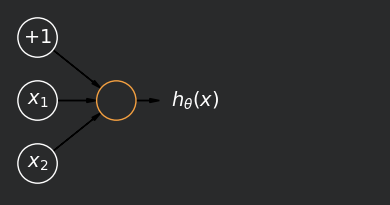

In [4]:
pgm = daft.PGM([4.7, 2.35], origin=[-1.35, 2.])

xpos = -1
pgm.add_node(daft.Node("bias", r"$+1$", xpos, 4, plot_params=node_pps))
pgm.add_node(daft.Node("x1", r"$x_1$", xpos, 3.2, plot_params=node_pps))
pgm.add_node(daft.Node("x2", r"$x_2$", xpos, 2.4, plot_params=node_pps))

xpos += 1
pgm.add_node(daft.Node("neuron", "", 0, 3.2, plot_params=neuron_style))

xpos += 1
pgm.add_node(daft.Node("h", r"$h_\theta(x)$", 1, 3.2, aspect=1.8, plot_params=output_style))

pgm.add_edge("bias", "neuron")
pgm.add_edge("x1", "neuron")
pgm.add_edge("x2", "neuron")
pgm.add_edge("neuron", "h")

# pgm.render()
pgm.show()

Let's assign weights $\Theta_0=-30, \Theta_1=20, \Theta_2=20$.  Using the above network,

$$
h_\Theta(x) = g(-30 + 20x_1 + 20x_2)
$$

| $x_1$ | $x_2$ | $h_\Theta(x)$ |
|---|---|--------|
| $0$ | $0$ | $g(-30) \approx 0$ |
| $0$ | $1$ | $g(-10) \approx 0$ |
| $1$ | $0$ | $g(-10) \approx 0$ |
| $1$ | $1$ | $g(10) \approx 1$ |

So this behaves like $x_1 \mathrm{~AND~} x_2$.

What about $\Theta_0=-10, \Theta_1=20, \Theta_2=20$.

$$
h_\Theta(x) = g(-10 + 20x_1 + 20x_2)
$$

| $x_1$ | $x_2$ | $h_\Theta(x)$ |
|---|---|--------|
| $0$ | $0$ | $g(-10) \approx 0$ |
| $0$ | $1$ | $g(10) \approx 1$ |
| $1$ | $0$ | $g(10) \approx 1$ |
| $1$ | $1$ | $g(30) \approx 1$ |

So this behaves like $x_1 \mathrm{~OR~} x_2$.


## Simplest example: negation

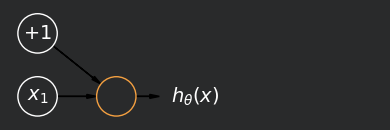

In [5]:
pgm = daft.PGM([4.7, 1.4], origin=[-1.35, 2.])

xpos = -1
ypos = 3.1
yspace = 0.8
pgm.add_node(daft.Node("bias", r"$+1$", xpos, ypos, plot_params=node_pps))
pgm.add_node(daft.Node("x1", r"$x_1$", xpos, ypos-yspace, plot_params=node_pps))

xpos += 1
pgm.add_node(daft.Node("neuron", "", 0, ypos-yspace, plot_params=neuron_style))

xpos += 1
pgm.add_node(daft.Node("h", r"$h_\theta(x)$", 1, ypos-yspace, aspect=1.8, plot_params=output_style))

pgm.add_edge("bias", "neuron")
pgm.add_edge("x1", "neuron")
pgm.add_edge("neuron", "h")

pgm.show()

Let's use this network with weights $\Theta_0=10, \Theta_1=-20$.

$$
h_\Theta(x) = g(10 - 20x_1)
$$

| $x_1$ | $h_\Theta(x)$ |
|---|---|
| $0$ | $g(10) \approx 1$ |
| $1$ | $g(-10) \approx 0$ |

So this behaves like $\mathrm{NOT~}x_1$.

We can extend this idea to make $(\mathrm{~NOT~}x_1)\mathrm{~AND~}(\mathrm{~NOT~}x_2)$ when 
$\Theta_0=10, \Theta_1=-20, \Theta_2=-20$.  This will be useful later.

| $x_1$ | $x_2$ | $h_\Theta(x)$ |
|---|---|----|
| $0$ | $0$ | $1$ |
| $0$ | $1$ | $0$ |
| $1$ | $0$ | $0$ |
| $1$ | $1$ | $0$ |

## Bring it together to build XNOR

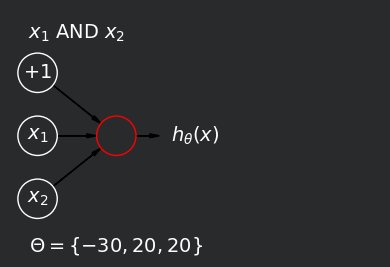

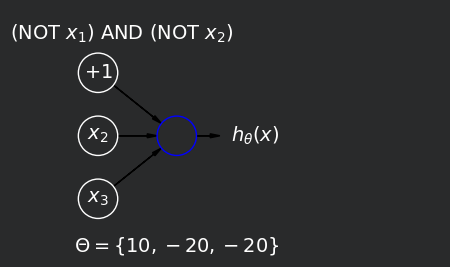

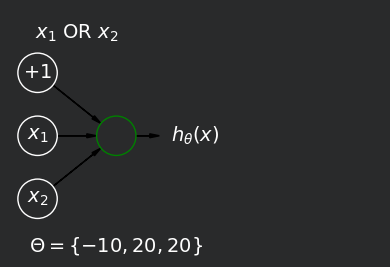

In [6]:
and_style = {"ec": "r", "fc": "#292a2b"}
nandn_style = {"ec": "b", "fc": "#292a2b"}
or_style = {"ec": "g", "fc": "#292a2b"}

with mpl.rc_context(rc={'font.family': 'serif', 'font.size': 14}):
    pgm = daft.PGM([4.7, 3], origin=[-1.35, 1.8])

    xpos = -1
    pgm.add_node(daft.Node("bias", r"$+1$", xpos, 4, plot_params=node_pps))
    pgm.add_node(daft.Node("x1", r"$x_1$", xpos, 3.2, plot_params=node_pps))
    pgm.add_node(daft.Node("x2", r"$x_2$", xpos, 2.4, plot_params=node_pps))
    pgm.add_node(daft.Node("and", r"$x_1 ~\mathrm{AND}~ x_2$", xpos+.5, 4.5, plot_params=label_style))
    pgm.add_node(daft.Node("theta", r"$\Theta=\{-30, 20, 20\}$", xpos+1, 1.8, plot_params=label_style))

    xpos += 1
    pgm.add_node(daft.Node("neuron", "", 0, 3.2, plot_params=and_style))

    xpos += 1
    pgm.add_node(daft.Node("h", r"$h_\theta(x)$", 1, 3.2, aspect=1.8, plot_params=output_style))

    pgm.add_edge("bias", "neuron", **and_style)
    pgm.add_edge("x1", "neuron", **and_style)
    pgm.add_edge("x2", "neuron", **and_style)
    pgm.add_edge("neuron", "h", **and_style)

    pgm.render()

with mpl.rc_context(rc={'font.family': 'serif', 'font.size': 14}):
    pgm = daft.PGM([4.7, 3], origin=[-1.35, 1.8])

    xpos = -1
    pgm.add_node(daft.Node("bias", r"$+1$", xpos, 4, plot_params=node_pps))
    pgm.add_node(daft.Node("x1", r"$x_2$", xpos, 3.2, plot_params=node_pps))
    pgm.add_node(daft.Node("x2", r"$x_3$", xpos, 2.4, plot_params=node_pps))
    pgm.add_node(daft.Node("and", r"$(\mathrm{NOT}~x_1) ~\mathrm{AND}~ (\mathrm{NOT}~x_2)$", xpos+.3, 4.5, plot_params=label_style))
    pgm.add_node(daft.Node("theta", r"$\Theta=\{10, -20, -20\}$", xpos+1, 1.8, plot_params=label_style))

    xpos += 1
    pgm.add_node(daft.Node("neuron", "", 0, 3.2, plot_params=nandn_style))

    xpos += 1
    pgm.add_node(daft.Node("h", r"$h_\theta(x)$", 1, 3.2, aspect=1.8, plot_params=output_style))

    pgm.add_edge("bias", "neuron", **nandn_style)
    pgm.add_edge("x1", "neuron", **nandn_style)
    pgm.add_edge("x2", "neuron", **nandn_style)
    pgm.add_edge("neuron", "h", **nandn_style)

    pgm.render()

with mpl.rc_context(rc={'font.family': 'serif', 'font.size': 14}):
    pgm = daft.PGM([4.7, 3], origin=[-1.35, 1.8])

    xpos = -1
    pgm.add_node(daft.Node("bias", r"$+1$", xpos, 4, plot_params=node_pps))
    pgm.add_node(daft.Node("x1", r"$x_1$", xpos, 3.2, plot_params=node_pps))
    pgm.add_node(daft.Node("x2", r"$x_2$", xpos, 2.4, plot_params=node_pps))
    pgm.add_node(daft.Node("and", r"$x_1 ~\mathrm{OR}~ x_2$", xpos+.5, 4.5, plot_params=label_style))
    pgm.add_node(daft.Node("theta", r"$\Theta=\{-10, 20, 20\}$", xpos+1, 1.8, plot_params=label_style))

    xpos += 1
    pgm.add_node(daft.Node("neuron", "", 0, 3.2, plot_params=or_style))

    xpos += 1
    pgm.add_node(daft.Node("h", r"$h_\theta(x)$", 1, 3.2, aspect=1.8, plot_params=output_style))

    pgm.add_edge("bias", "neuron", **or_style)
    pgm.add_edge("x1", "neuron", **or_style)
    pgm.add_edge("x2", "neuron", **or_style)
    pgm.add_edge("neuron", "h", **or_style)

    # pgm.render()
    pgm.show()

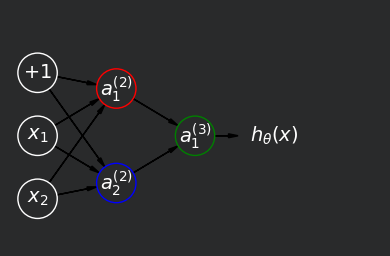

In [7]:
pgm = daft.PGM([4.7, 3], origin=[-1.35, 1.8])

xpos = -1
pgm.add_node(daft.Node("bias", r"$+1$", xpos, 4, plot_params=node_pps))
pgm.add_node(daft.Node("x1", r"$x_1$", xpos, 3.2, plot_params=node_pps))
pgm.add_node(daft.Node("x2", r"$x_2$", xpos, 2.4, plot_params=node_pps))

xpos += 1
pgm.add_node(daft.Node("a21", r"$a_1^{(2)}$", xpos, 3.8, plot_params=and_style))

pgm.add_edge("bias", "a21", **and_style)
pgm.add_edge("x1", "a21", **and_style)
pgm.add_edge("x2", "a21", **and_style)

pgm.add_node(daft.Node("a22", r"$a_2^{(2)}$", xpos, 2.6, plot_params=nandn_style))

pgm.add_edge("bias", "a22", **nandn_style)
pgm.add_edge("x1", "a22", **nandn_style)
pgm.add_edge("x2", "a22", **nandn_style)

xpos += 1
pgm.add_node(daft.Node("a31", r"$a_1^{(3)}$", xpos, 3.2, plot_params=or_style))

pgm.add_edge("a21", "a31", **or_style)
pgm.add_edge("a22", "a31", **or_style)

xpos += 1
pgm.add_node(daft.Node("h", r"$h_\theta(x)$", xpos, 3.2, aspect=1.8, plot_params=output_style))

pgm.add_edge("a31", "h", **or_style)

pgm.show()

| $x_1$ | $x_2$ | $a_1^{(2)}$ | $a_2^{(2)}$ | $h_\Theta(x)$ |
|---|---|---|---|---|
| $0$ | $0$ | $0$ | $1$ | $1$ |
| $0$ | $1$ | $0$ | $0$ | $0$ |
| $1$ | $0$ | $0$ | $0$ | $0$ |
| $1$ | $1$ | $1$ | $0$ | $1$ |

## Example

Let's consider a specific four-layer network with densly connected layers that takes three inputs and has four outputs.

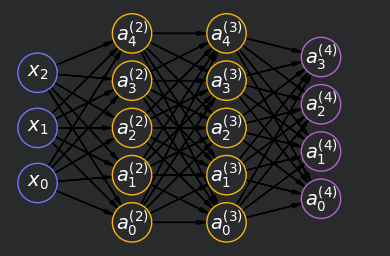

In [8]:
input_style = {"ec": "#7572FF", "fc": "#292a2b"}
hidden_style = {"ec": "#FBB40C", "fc": "#292a2b"}
output_style = {"ec": "#B166CC", "fc": "#292a2b"}

label_style = {"lw": 0}

pgm = daft.PGM([4.7, 3], origin=[-1.35, 1.8])

all_nodes = []
xpos = -1
layer = 1

nnodes = 3
nodes = ["x{}".format(i) for i in range(nnodes)]
labels = [r"$x_{}$".format(i) for i in range(nnodes)]
positions = np.linspace(2.6, 4., nnodes)
for node, label, ypos in zip(nodes, labels, positions):
    pgm.add_node(daft.Node(node, label, xpos, ypos, plot_params=input_style))
all_nodes.append(nodes)

xpos += 1.2
layer += 1

nnodes = 5
nodes = ["a{}{}".format(layer, i) for i in range(nnodes)]
labels = [r"$a_{}^{{({})}}$".format(i, layer) for i in range(nnodes)]
positions = np.linspace(2.1, 4.5, nnodes)
for node, label, ypos in zip(nodes, labels, positions):
    pgm.add_node(daft.Node(node, label, xpos, ypos, plot_params=hidden_style))
all_nodes.append(nodes)

for n1 in all_nodes[-2]:
    for n2 in all_nodes[-1]:
        pgm.add_edge(n1, n2)

xpos += 1.2
layer += 1

nnodes = 5
nodes = ["a{}{}".format(layer, i) for i in range(nnodes)]
labels = [r"$a_{}^{{({})}}$".format(i, layer) for i in range(nnodes)]
positions = np.linspace(2.1, 4.5, nnodes)
for node, label, ypos in zip(nodes, labels, positions):
    pgm.add_node(daft.Node(node, label, xpos, ypos, plot_params=hidden_style))
all_nodes.append(nodes)

for n1 in all_nodes[-2]:
    for n2 in all_nodes[-1]:
        pgm.add_edge(n1, n2)

xpos += 1.2
layer += 1

nnodes = 4
nodes = ["a{}{}".format(layer, i) for i in range(nnodes)]
labels = [r"$a_{}^{{({})}}$".format(i, layer) for i in range(nnodes)]
positions = np.linspace(2.4, 4.2, nnodes)
for node, label, ypos in zip(nodes, labels, positions):
    pgm.add_node(daft.Node(node, label, xpos, ypos, plot_params=output_style))
all_nodes.append(nodes)

for n1 in all_nodes[-2]:
    for n2 in all_nodes[-1]:
        pgm.add_edge(n1, n2)

pgm.show()

Given some training point $(x, y)$, the hypothesis is evaluated according to
$$
\begin{aligned}
a^{(1)} &= x \\
z^{(2)} &= \Theta^{(1)}a^{(1)} \\
a^{(2)} &= g(z^{(2)})~~(\mathrm{add}~a_0^{(2)}) \\
z^{(3)} &= \Theta^{(2)}a^{(2)} \\
a^{(3)} &= g(z^{(3)})~~(\mathrm{add}~a_0^{(3)}) \\
z^{(4)} &= \Theta^{(4)}a^{(4)} \\
a^{(4)} &= h_\Theta(x) = g(z^{(4)})
\end{aligned}
$$

# Cost function

First let's define a few parameters for our network: $L$ is the number of layers in the network, $s_l$ is the number of units (not counting the bias unit) in layer $l$, and $K$ is the number of outputs $h_\Theta(x)_k$ (we can have more than one).

Recall our cost function for regularized logistic regression

$$
J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)}\log h_\theta(x^{(i)}) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))\right] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2
$$

For neural networks we need to account for multiple output nodes and multiple parameter matrices

$$
J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^m \sum_{k=1}^K y^{(i)}_k\log h_\theta(x^{(i)})_k + (1 - y^{(i)}_k)\log (1 - h_\theta(x^{(i)})_k)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}} (\Theta_{j,i}^{(l)})^2
$$

Now let's look into a new activation (hypothesis) function.  So far we've been using the sigmoid function, which recall is

$$
g(z) = \frac{1}{1+e^{-z}} = \frac{e^z}{e^z+1}
$$

Recall that for two-category problems, we could interpret it's output as the probability of $y=1$.

We found a way to use it for multi-class ploblems using the *one-vs-all* technique, where we built a bunch of classifiers, each separating one class from the rest, and took the maximum probability as the prediction.

We're now going to generalize the sigmoid function to multiple classes

$$
\sigma(\vec{z})_j = \frac{e^{z_j}}{\sum_{k=1}^Ke^{z_k}}~~\mathrm{for}~j=1,\ldots,K
$$

This is usually called the *softmax* function, but a better name would be the soft*arg*max function, as it's basically a smoothly behaving version of `argmax`.  It will return a vector with the same shape as its argument, with values approach $1$ for the maximum elements.  This gives us a way to estimate the probability of class association again:

$$
P(y=j|x, \{w_k\}_{k=1,\ldots, K}) = \frac{e^{x^Tw_j}}{\sum_{k=1}^Ke^{x^Tw_k}}
$$

In [9]:
from scipy.special import softmax

softmax([0, 1, 50, 3])

array([1.92874985e-22, 5.24288566e-22, 1.00000000e+00, 3.87399763e-21])